<img src="potential_well.png">

An electron is trapped in a potential well of the form, 
$$
V(x) = 
\begin{cases}
    0 & 0 < x < L \\
    \infty & \mbox{Otherwise}
\end{cases}
$$

We wish to solve the Schrödinger equation (time independent) for this potenial.

$$
\frac{-\hbar^2}{2m} \frac{d^2\psi(x)}{dx^2} + V(x) \psi(x) = E\psi(x)
$$

or rearranging it,
$$
\frac{d^2\psi(x)}{dx^2} - \frac{2m}{\hbar^2}\bigg(V(x) - E) \bigg)\psi(x) = 0
$$

In the well, $V(x) = 0$, so
$$
\frac{d^2\psi(x)}{dx^2} + \frac{2mE}{\hbar^2}\psi(x) = 0
$$

Our boundary conditions are,
$$\psi(0) = 0,$$
and
$$\psi(L) = 0.$$

Let
$$
k^2 = \frac{2mE}{\hbar^2}$$

So out equation is now,
$$
\frac{d^2\psi(x)}{dx^2} + k^2\psi(x) = 0.
$$

$$\psi(x) = A\sin(kx) + Bcos(kx)$$

Imposing the left-hand boundary condition $\psi(0) = 0$ implies that $B=0.$ since $\cos(0) = 1$.

This leaves us with 

$$\psi(x) = A\sin(kx)$$

Imposing the right-hand bounday condition, $\psi(L) = 0$, we have,

$$k = \frac{n\pi}{L}$$

$$\frac{2mE}{\hbar^2}  = \frac{n^2\pi^2}{L^2}$$

or

$$E_n = \frac{n^2\pi^2\hbar^2}{2mL^2}$$

To get $A$, we use the normalization condition,

$$\int_{-\infty}^{\infty} \psi^*\psi dx = 1.$$

Plugging in our expression for $\psi$, we have, 
$$  \int_0^L A^2\sin^2(kx) dx = 1.$$

After integration,
$$
\left[ \frac{A^2x}{2} - \frac{A^2}{2k}\cos(kx)\sin(kx)\right]_0^L
= 1.
$$

So,

$$\frac{A^2L}{2} = 1$$

giving 

$$A = \sqrt{ \frac{2}{L} }.$$

Or wave function is now,

$$\psi(x) = \sqrt{ \frac{2}{L} }
\sin\left( \frac{n\pi}{L} x \right), \quad n = 1,2,3 ...
$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

%matplotlib inline

In [3]:
#  This function calculates the energy and plots the wavefunction for a specified value of n.
def plot_eigenfunction(m, hbar, L, n):
    x = np.linspace(0, L, 100)
    y = np.sqrt(2/L) * np.sin(n * np.pi / L * x)
    
    plt.figure()
    plt.plot(x, y, 'k')
    plt.grid()
    
    print( (n**2 * np.pi** 2 * hbar**2 ) / (2 * m * L**2) )
    
    plt.title( 'n = ' + str(n))
    

In [4]:
#  Parameters:  mass of electron, Planck's constrant, and the width of pur box.
m = 9.1e-31
hbar = 1.05e-34
L = 5e-10

2.3914810664178063e-19


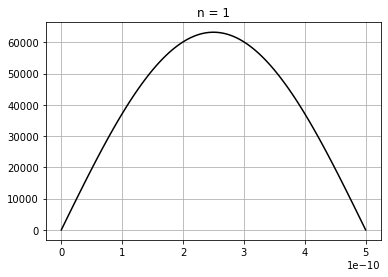

In [5]:
#  Plot the results for n = 1
plot_eigenfunction(m, hbar, L, 1)

9.565924265671225e-19


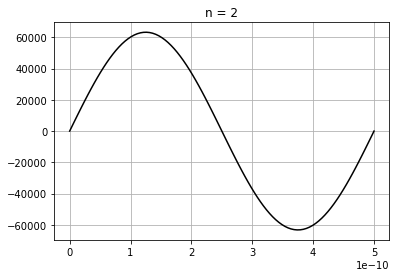

In [6]:
#  Plot the results for n = 2
plot_eigenfunction(m, hbar, L, 2)

#  Numerical Solution

We've gone over the shototing method in other videos, so I won't rehash all the details.  In this case, we want to adjust the values of $E$ so that our boundary conditions are met.

The issue we have is that we don't know the first derivative at the right-hand boundary.

Consider the follwoing.

If $\psi$ is a solution that satisfies the differential equation, so is $\alpha\psi$.  We can easilly see this by plugging $\alpha\psi$ into our equation.

$$
\frac{-\hbar^2}{2m} \frac{d^2\alpha\psi(x)}{dx^2} + V(x) \alpha\psi(x) = E\alpha\psi(x)
$$

Due to the linear nature of the derivative opperator, this becomes,

$$
\frac{-\alpha\hbar^2}{2m} \frac{d^2\psi(x)}{dx^2} + V(x) \alpha\psi(x) = E\alpha\psi(x),
$$

and we can see that $\alpha$ will drop out.

So, for the first derivative,

$$\frac{d}{dx}\alpha\psi = a\frac{d\psi}{dx}$$

In other words, if we plug in a wrong value for the first derivative, we simply get back a rescaled solution to our equation.  We can get the actual solution via the normalization constraint.

So below, I will simply choose the first derivative to be equal to 1.

In [7]:
#  Our differential equation
def equation(x, y, E):
    m = 9.1e-31
    hbar = 1.05e-34
    
    yprime = np.zeros(2)
    
    yprime[0] = y[1]
    yprime[1] = -2 * m * E / hbar**2 * y[0]
    
    return yprime

Text(0, 0.5, '$\\psi$')

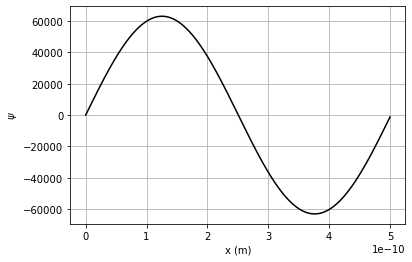

In [9]:
#  x is out spatial variable
x = np.linspace(0, L, 1000)
xspan = (x[0], x[-1])

#  This is the eugenvalue.  We adjust it so we have the proper boundary conditions
#  This value is for n = 2.
E = 9.5e-19

#  Initial conditions.  The derivative isn't right, but this doesn't matter.
y0 = [0, 1]

#  Calculate the unnormalized solution
sol = solve_ivp(lambda x, y: equation(x, y, E), xspan, y0, t_eval = x)
psi = sol.y[0, :]

#  Normalize
area = np.trapz(psi**2, x)
psi = psi / np.sqrt(area)

plt.plot(x, psi, 'k')
plt.grid()
plt.xlabel('x (m)')
plt.ylabel('$\psi$')